In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import bgmm.gmm as gmm
from bgmm.distributions import Gaussian, InverseGamma, Multinomial, Dirichlet
from matplotlib.mlab import normpdf

In [2]:
# Generate synthetic data
means = np.array([ 2, 3, 5])
sigmas = np.array([0.1, 0.3, 0.6])
coef = np.array([0.2, 0.3, 0.5])
cdf = np.cumsum(coef)

samples = np.zeros([10000])
for i in range(samples.shape[0]):
    rand = np.random.random()
    m = cdf.searchsorted(rand)
    samples[i] = sigmas[m]*np.random.randn() + means[m]

In [3]:
# put samples into (N x D) matrix. 
samples = samples[:, np.newaxis]

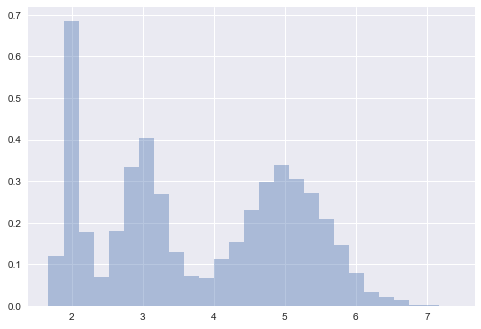

In [6]:
seaborn.distplot(samples, kde=False, norm_hist=True)

In [7]:
# Initialize state
z = np.random.randint(low=0, high=3, size=10000)
p = np.random.dirichlet([1, 1, 1])
mu = np.random.uniform(low=2, high=5, size=3)
mu = np.array([[mu[0]], [mu[1]], [mu[2]]])
sigma = np.array([0.1, 0.1, 0.1])
state = gmm.State(z=z, mu=mu, sigma_aq_mu=1, sigma_sq_n=sigma, pi=p)

In [8]:
# Initialiize model
alpha = np.array([1, 1, 1])
K = 3
sigma = np.array([0.001, 0.001, 0.001])
sigma_mu = InverseGamma(0.0001, 0.0001)
sigma_n = InverseGamma(sigma, sigma)
model = gmm.Model(alpha=alpha, K=K, sigma_sq_mu_prior=sigma_mu, sigma_sq_n_prior=sigma_n)

In [9]:
sampler = gmm.Sampler(niter=1000, model=model, state=state, X=samples)

In [10]:
sampler.sample()

100%|██████████| 1000/1000 [00:36<00:00, 27.61it/s]


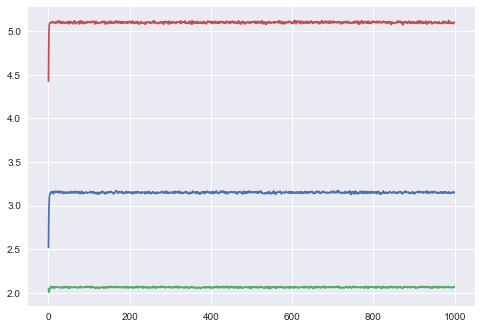

In [11]:
plt.plot(sampler.logger['mean'][:, 0])
plt.plot(sampler.logger['mean'][:, 1])
plt.plot(sampler.logger['mean'][:, 2])

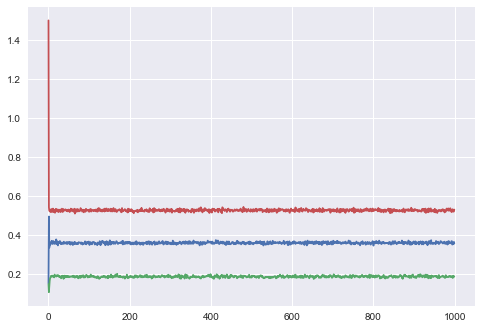

In [12]:
plt.plot(np.sqrt(sampler.logger['sigma_sq_n'][:]))

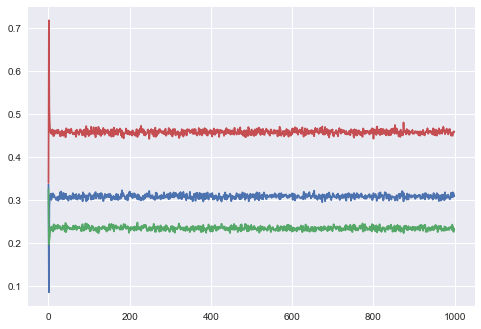

In [13]:
plt.plot(sampler.logger['pi'][:, 0])
plt.plot(sampler.logger['pi'][:, 1])
plt.plot(sampler.logger['pi'][:, 2])

In [14]:
sampler.state.z

array([1, 0, 0, ..., 1, 0, 2])

(array([  414.,   851.,  1053.,   984.,   721.,   373.,   124.,    47.,
           10.,     2.]),
 array([ 4.07914922,  4.40984653,  4.74054383,  5.07124114,  5.40193844,
         5.73263574,  6.06333305,  6.39403035,  6.72472765,  7.05542496,
         7.38612226]),
 <a list of 10 Patch objects>)

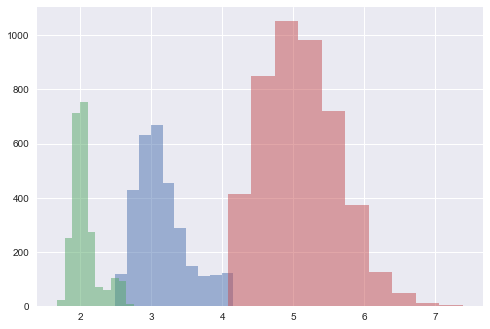

In [15]:
alpha=0.5
plt.hist(samples[np.where(sampler.state.z==0)], alpha=alpha)
plt.hist(samples[np.where(sampler.state.z==1)], alpha=alpha)
plt.hist(samples[np.where(sampler.state.z==2)], alpha=alpha)

(array([  1.67000000e+02,   1.26000000e+03,   6.18000000e+02,
          9.70000000e+01,   2.47000000e+02,   4.54000000e+02,
          7.31000000e+02,   7.39000000e+02,   4.75000000e+02,
          2.28000000e+02,   1.39000000e+02,   1.13000000e+02,
          1.87000000e+02,   2.76000000e+02,   3.58000000e+02,
          5.44000000e+02,   5.88000000e+02,   6.21000000e+02,
          5.89000000e+02,   4.98000000e+02,   4.08000000e+02,
          3.04000000e+02,   1.71000000e+02,   7.70000000e+01,
          5.70000000e+01,   3.00000000e+01,   1.80000000e+01,
          4.00000000e+00,   1.00000000e+00,   1.00000000e+00]),
 array([ 1.67470766,  1.86508814,  2.05546863,  2.24584912,  2.43622961,
         2.62661009,  2.81699058,  3.00737107,  3.19775155,  3.38813204,
         3.57851253,  3.76889301,  3.9592735 ,  4.14965399,  4.34003447,
         4.53041496,  4.72079545,  4.91117593,  5.10155642,  5.29193691,
         5.48231739,  5.67269788,  5.86307837,  6.05345885,  6.24383934,
         6.43

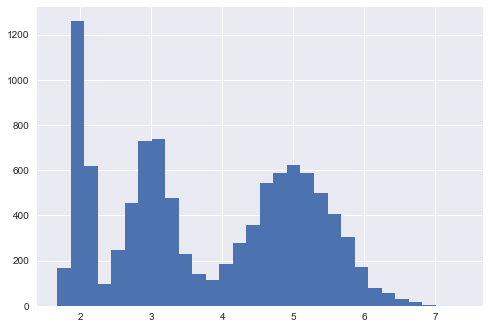

In [16]:
#seaborn.distplot(samples, kde=False)
plt.hist(samples, bins=30)